<a href="https://colab.research.google.com/github/yosuke-mori/my-macro-project/blob/main/%E5%AE%9A%E9%87%8F%E3%83%9E%E3%82%AF%E3%83%AD%E6%9C%80%E7%B5%82%E8%AA%B2%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# importing libraries

import numpy as np
import matplotlib.pyplot as plt

In [24]:
# utility function
def util(cons,gamma):
  return max(cons,1e-4)**(1-gamma)/(1-gamma)

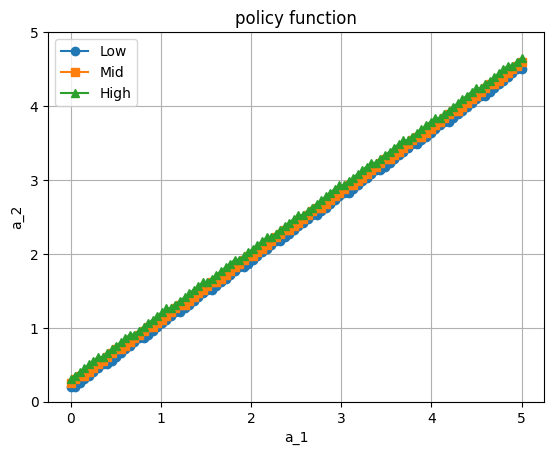

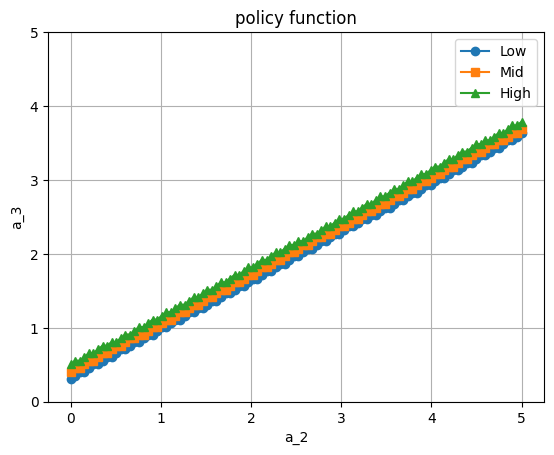

In [25]:
# (1)年金がない場合の政策関数

# parameters
gamma = 2.0
beta = 0.985**20
r = 1.025**20-1.0
y = np.array([1.0, 1.2, 0])
JJ = 3
l = np.array([0.8027, 1.0, 1.2457])
NL = 3
prob = np.array([
    [0.7451, 0.2528, 0.0021],
    [0.1360, 0.7281, 0.1360],
    [0.0021, 0.2528, 0.7451]
])
mu_1 = np.array([1.0/NL, 1.0/NL, 1.0/NL])
mu_2 = np.zeros(NL)

for il in range(NL):
    for ilp in range(NL):
        mu_2[ilp] += prob[il, ilp]*mu_1[il]


# grids
a_l = 0.0
a_u = 5.0
NA = 100
a = np.linspace(a_l, a_u, NA)

# initialization
v = np.zeros((JJ, NA, NL))
iaplus = np.zeros((JJ, NA, NL), dtype=int)
aplus = np.zeros((JJ, NA, NL))

# backward induction

# period 3
for ia in range(NA):
    v[2, ia, :] = util(y[2] + (1.0+r)*a[ia], gamma)


# period 2
for il in range(NL):
    for ia in range(NA):
        reward = np.zeros(NA)
        for iap in range(NA):
            reward[iap] = util(l[il] + (1.0+r)*a[ia] - a[iap], gamma) + beta*v[2, iap, 0]
        iaplus[1, ia, il] = np.argmax(reward)
        aplus[1, ia, il] = a[iaplus[1, ia, il]]
        v[1, ia, il] = reward[iaplus[1, ia, il]]

# period 1
for il in range(NL):
    for ia in range(NA):
        reward = np.zeros(NA)
        for iap in range(NA):

            EV = 0.0
            for ilp in range(NL):
                EV += prob[il, ilp]*v[1, iap, ilp]

            reward[iap] = util(l[il] + a[ia]*(1.0+r) - a[iap], gamma) + beta*EV

        iaplus[0, ia, il] = np.argmax(reward)
        aplus[0, ia, il] = a[iaplus[0, ia, il]]
        v[0, ia, il] = reward[iaplus[0, ia, il]]

#(4)のためにv(0,0,:)を保存
util_no_pension = v[0,0,:]


plt.figure()
plt.plot(a, aplus[0, :, 0], marker='o', label='Low')
plt.plot(a, aplus[0, :, 1], marker='s', label='Mid')
plt.plot(a, aplus[0, :, 2], marker='^', label='High')
plt.title("policy function")
plt.xlabel("a_1")
plt.ylabel("a_2")
plt.ylim(a_l, a_u)
plt.grid(True)
plt.legend()
#plt.savefig("policy_function1_no")
plt.show()


plt.figure()
plt.plot(a, aplus[1, :, 0], marker='o', label='Low')
plt.plot(a, aplus[1, :, 1], marker='s', label='Mid')
plt.plot(a, aplus[1, :, 2], marker='^', label='High')
plt.title("policy function")
plt.xlabel("a_2")
plt.ylabel("a_3")
plt.ylim(a_l, a_u)
plt.grid(True)
plt.legend()
#plt.savefig("policy_function2_no")
plt.show()

In [26]:
#(2) 一人当たり年金額の計算
tax = 0.3
revenue = 0

#税収の計算
for i in range(NL):
  revenue += mu_2[i] * l[i] * tax

#一人当たりの年金額(税収を利子率rで運用)
pension = revenue * (1+r)

print(f"税収は{revenue}")
print(f"一人当たり年金額は{pension}")

税収は0.30428468799999997
一人当たり年金額は0.49860589228543317


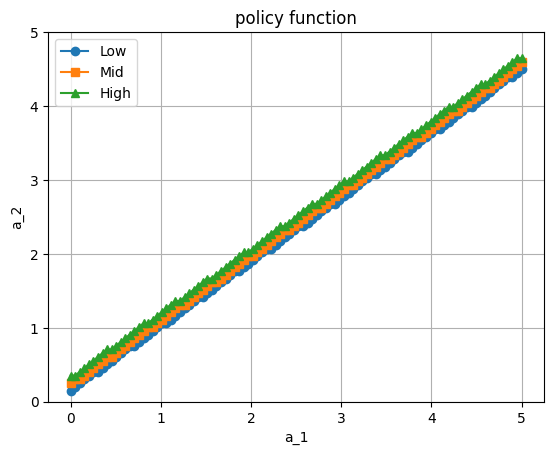

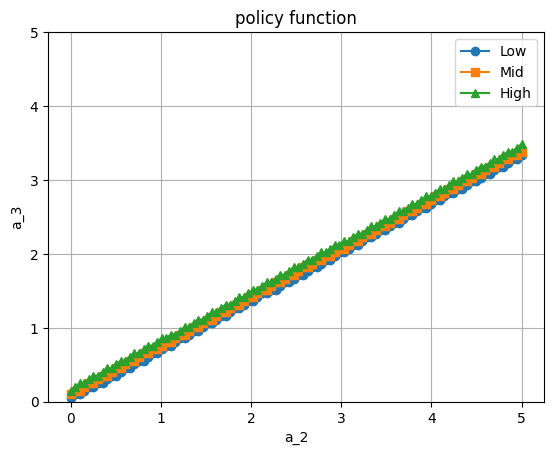

In [27]:
#(3)年金がある場合の政策関数
# parameters
gamma = 2.0
beta = 0.985**20
r = 1.025**20-1.0
y = np.array([1.0, 1.2, 0])
JJ = 3
l = np.array([0.8027, 1.0, 1.2457])
NL = 3
prob = np.array([
    [0.7451, 0.2528, 0.0021],
    [0.1360, 0.7281, 0.1360],
    [0.0021, 0.2528, 0.7451]
])
mu_1 = np.array([1.0/NL, 1.0/NL, 1.0/NL])
mu_2 = np.zeros(NL)

for il in range(NL):
    for ilp in range(NL):
        mu_2[ilp] += prob[il, ilp]*mu_1[il]


# grids
a_l = 0.0
a_u = 5.0
NA = 100
a = np.linspace(a_l, a_u, NA)

# initialization
v = np.zeros((JJ, NA, NL))
iaplus = np.zeros((JJ, NA, NL), dtype=int)
aplus = np.zeros((JJ, NA, NL))

# backward induction

# period 3
for ia in range(NA):
    v[2, ia, :] = util(y[2] + (1.0+r)*a[ia] +pension, gamma)


# period 2
for il in range(NL):
    for ia in range(NA):
        reward = np.zeros(NA)
        for iap in range(NA):
            reward[iap] = util(l[il] * (1-tax) + (1.0+r)*a[ia] - a[iap], gamma) + beta*v[2, iap, 0]
        iaplus[1, ia, il] = np.argmax(reward)
        aplus[1, ia, il] = a[iaplus[1, ia, il]]
        v[1, ia, il] = reward[iaplus[1, ia, il]]

# period 1
for il in range(NL):
    for ia in range(NA):
        reward = np.zeros(NA)
        for iap in range(NA):

            EV = 0.0
            for ilp in range(NL):
                EV += prob[il, ilp]*v[1, iap, ilp]

            reward[iap] = util(l[il] + a[ia]*(1.0+r) - a[iap], gamma) + beta*EV

        iaplus[0, ia, il] = np.argmax(reward)
        aplus[0, ia, il] = a[iaplus[0, ia, il]]
        v[0, ia, il] = reward[iaplus[0, ia, il]]

#(4)のためにv(0,0,:)を保存
util_pension = v[0,0,:]


plt.figure()
plt.plot(a, aplus[0, :, 0], marker='o', label='Low')
plt.plot(a, aplus[0, :, 1], marker='s', label='Mid')
plt.plot(a, aplus[0, :, 2], marker='^', label='High')
plt.title("policy function")
plt.xlabel("a_1")
plt.ylabel("a_2")
plt.ylim(a_l, a_u)
plt.grid(True)
plt.legend()
#plt.savefig("policy_function1")
plt.show()

plt.figure()
plt.plot(a, aplus[1, :, 0], marker='o', label='Low')
plt.plot(a, aplus[1, :, 1], marker='s', label='Mid')
plt.plot(a, aplus[1, :, 2], marker='^', label='High')
plt.title("policy function")
plt.xlabel("a_2")
plt.ylabel("a_3")
plt.ylim(a_l, a_u)
plt.grid(True)
plt.legend()
#plt.savefig("policy function2")
plt.show()

In [28]:
#(4)経済全体の平均期待生涯効用
util_no_pension_avg = util_no_pension.mean()
util_pension_avg = util_pension.mean()
amount_of_change = util_pension_avg - util_no_pension_avg

print(f"年金がない場合の平均期待生涯効用は{util_no_pension_avg}")
print(f"年金がある場合の平均期待生涯効用は{util_pension_avg}")
print(f"年金がある場合とない場合の効用の差分は{amount_of_change}")

年金がない場合の平均期待生涯効用は-2.838738267246338
年金がある場合の平均期待生涯効用は-2.820690713471489
年金がある場合とない場合の効用の差分は0.018047553774849234
